# Read the Data

In [1]:
!pip install mlxtend

In [3]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
BNK = pd.read_csv("book (2).csv")
BNK.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# EDA

In [5]:
BNK.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [6]:
BNK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
BNK.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
BNK.mean()

ChildBks     0.4230
YouthBks     0.2475
CookBks      0.4310
DoItYBks     0.2820
RefBks       0.2145
ArtBks       0.2410
GeogBks      0.2760
ItalCook     0.1135
ItalAtlas    0.0370
ItalArt      0.0485
Florence     0.1085
dtype: float64

In [9]:
BNK.mode()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
BNK.std()

ChildBks     0.494159
YouthBks     0.431668
CookBks      0.495340
DoItYBks     0.450086
RefBks       0.410578
ArtBks       0.427797
GeogBks      0.447129
ItalCook     0.317282
ItalAtlas    0.188809
ItalArt      0.214874
Florence     0.311089
dtype: float64

In [11]:
BNK.var()

ChildBks     0.244193
YouthBks     0.186337
CookBks      0.245362
DoItYBks     0.202577
RefBks       0.168574
ArtBks       0.183011
GeogBks      0.199924
ItalCook     0.100668
ItalAtlas    0.035649
ItalArt      0.046171
Florence     0.096776
dtype: float64

In [12]:
BNK.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

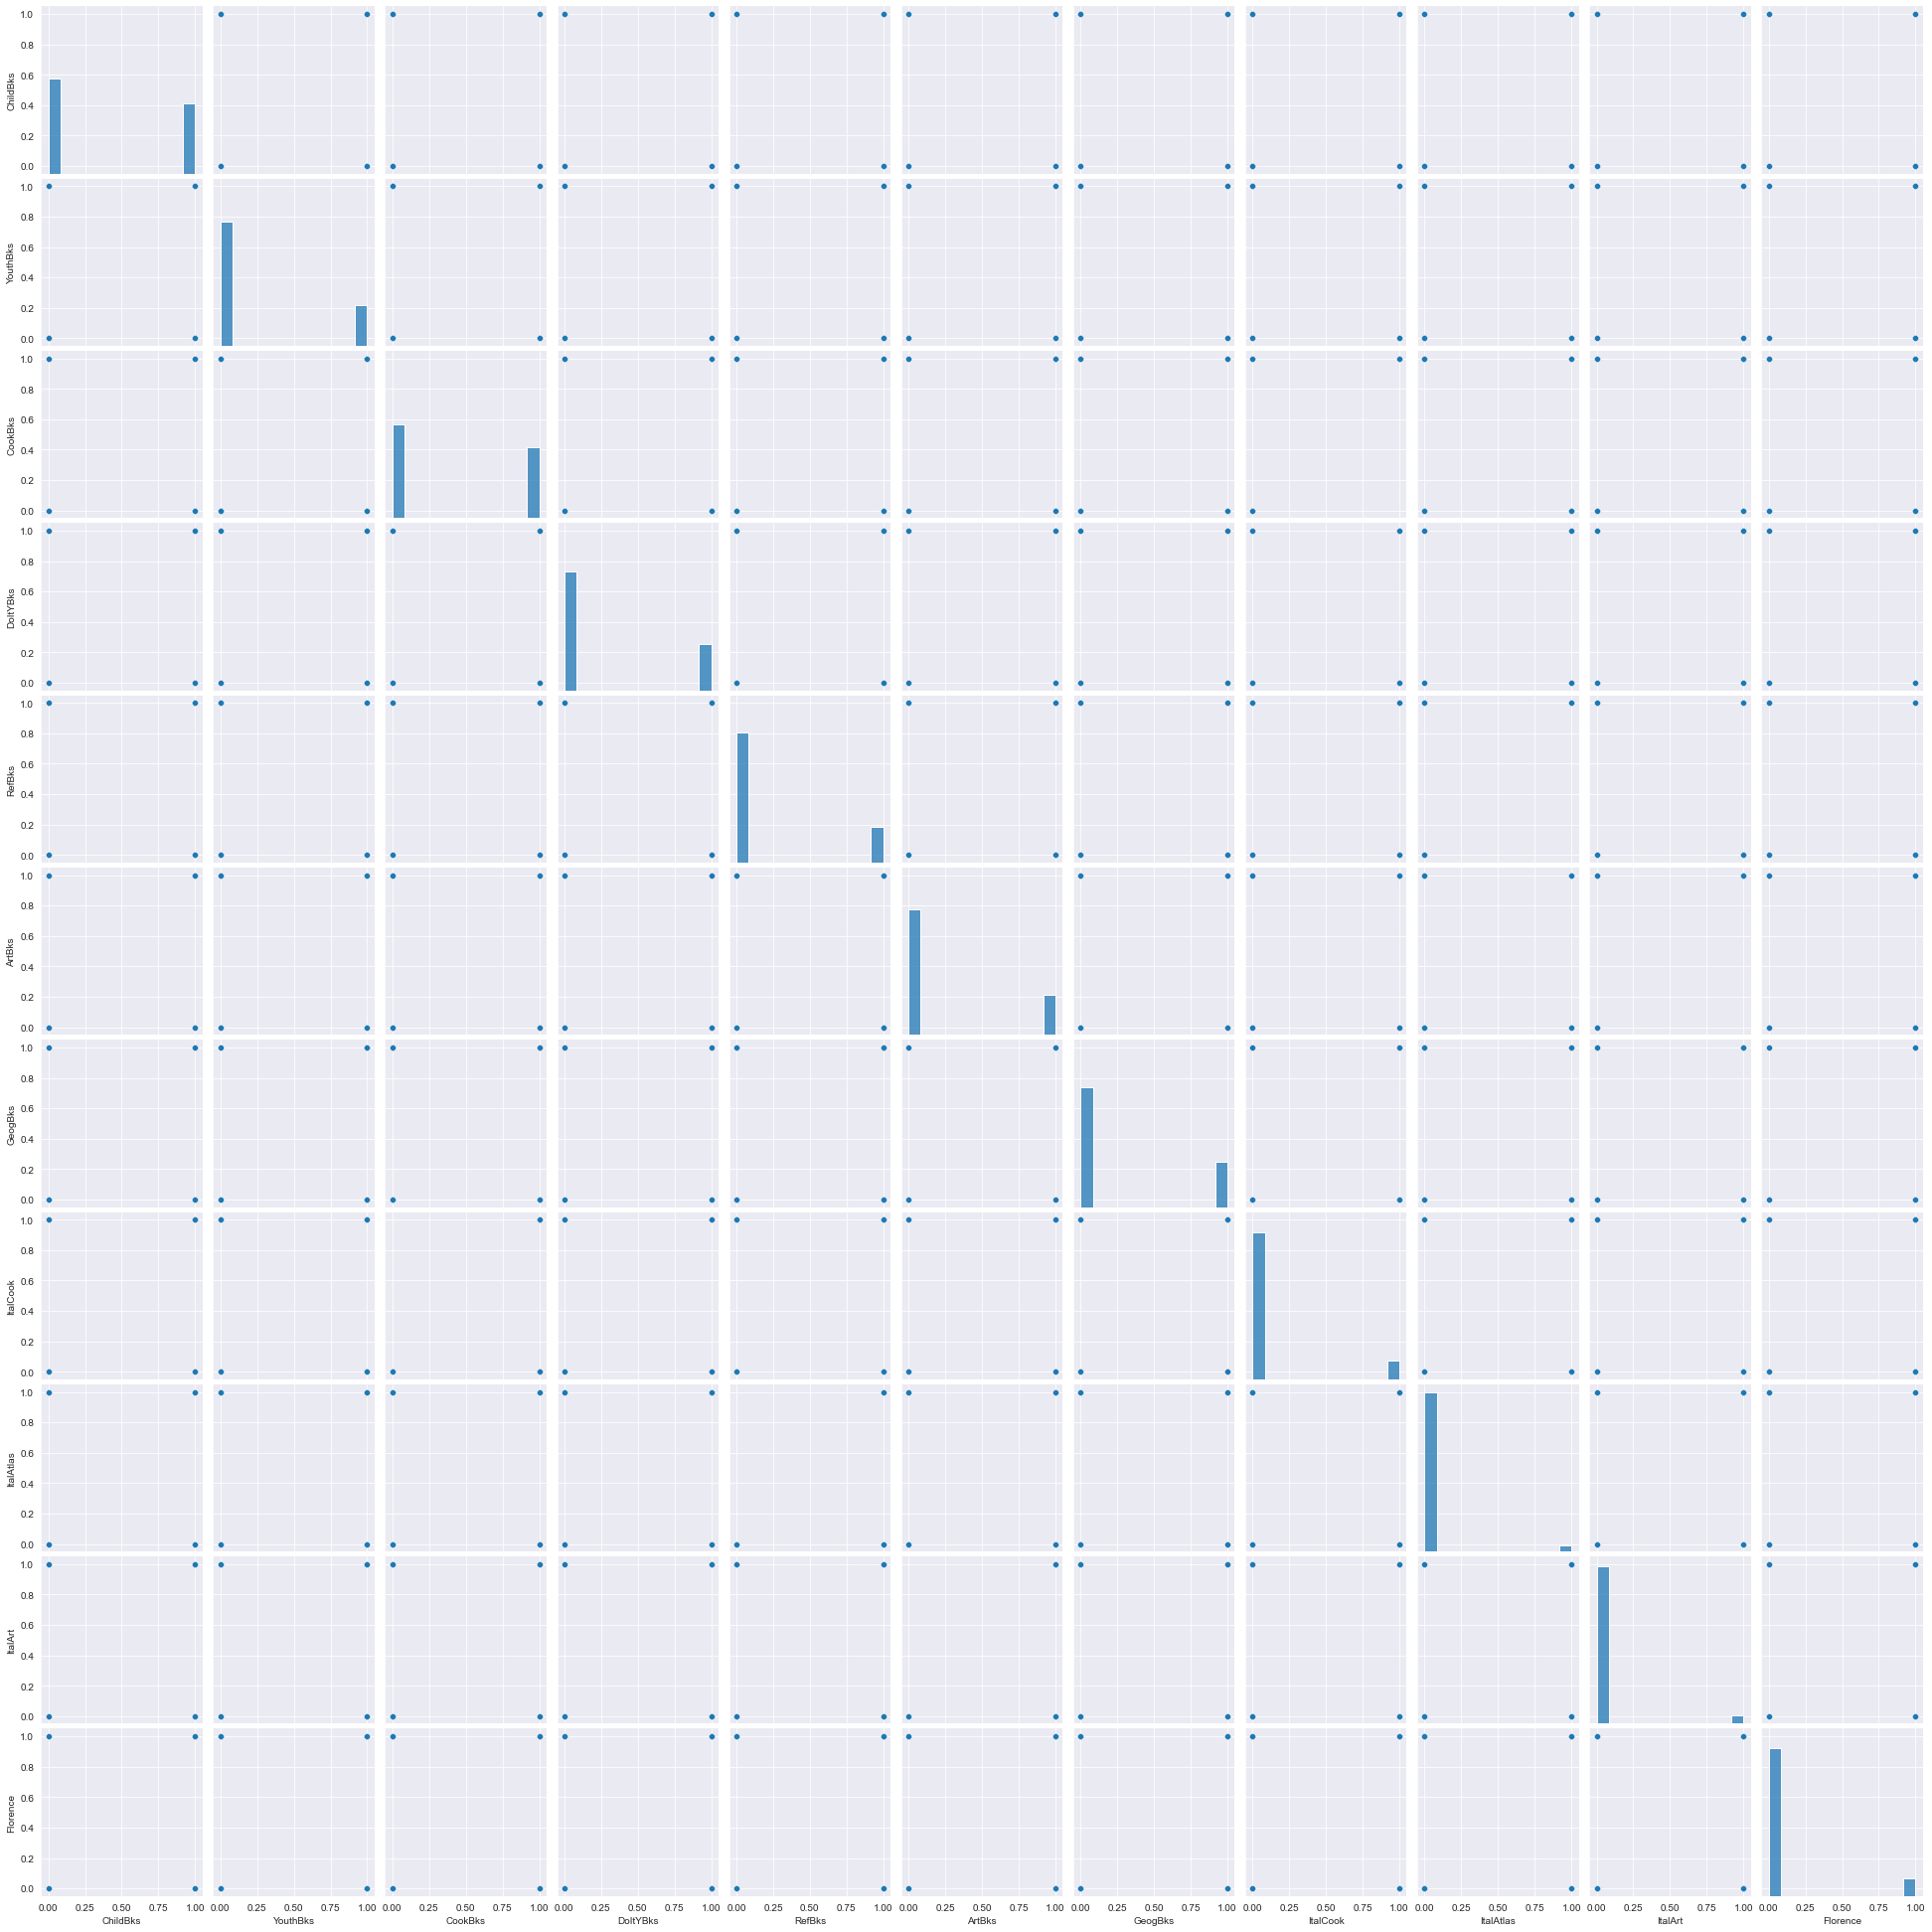

In [45]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(BNK)

# Pre-Processing

# As the data is not in transaction formation We are using transaction Encoder

In [13]:
BNK1 = pd.get_dummies(BNK)
BNK1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori Algorithm

In [14]:
import warnings
warnings.filterwarnings("ignore")
frequent_itemsets = apriori(BNK1,min_support=0.1,use_colnames=6) 
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [15]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules1
rules1.sort_values("lift",ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


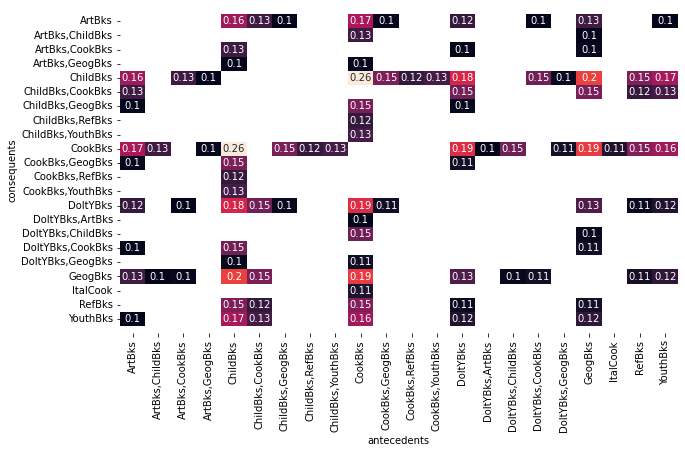

In [16]:
# Convert antecedents and consequents into strings
import  matplotlib.pyplot as plt
import seaborn as sns
rules1['antecedents'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules1.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

In [18]:
rules2= association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules2
rules2.sort_values("confidence",ascending=False).head(5) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
25,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
27,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
29,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
16,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


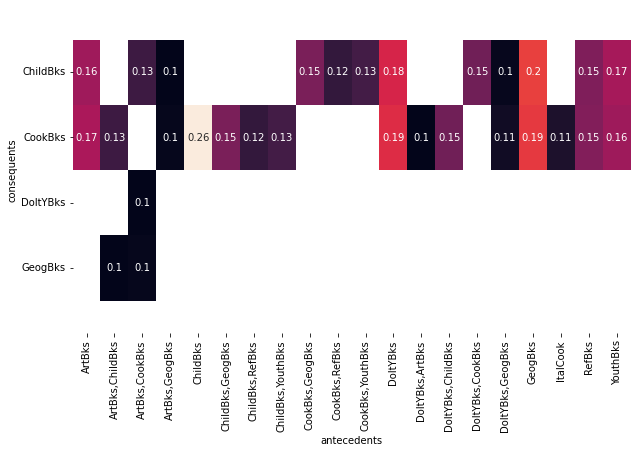

In [19]:
# Convert antecedents and consequents into strings
import  matplotlib.pyplot as plt
import seaborn as sns
rules2['antecedents'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['consequents'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules2.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

# Apriori Algorithm

In [20]:
frequent_itemsets1 = apriori(BNK1,min_support=0.2,use_colnames=6) 
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [21]:
rules3 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules3
rules3.sort_values("lift",ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


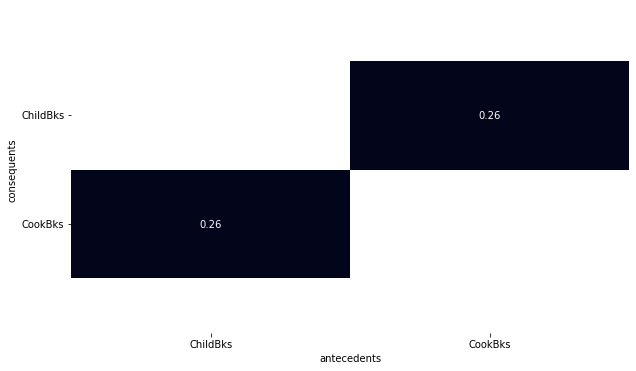

In [22]:
# Convert antecedents and consequents into strings
import  matplotlib.pyplot as plt
import seaborn as sns
rules3['antecedents'] = rules3['antecedents'].apply(lambda a: ','.join(list(a)))
rules3['consequents'] = rules3['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules3.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

In [23]:
rules4 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules4
rules4.sort_values("confidence",ascending=False).head(5) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


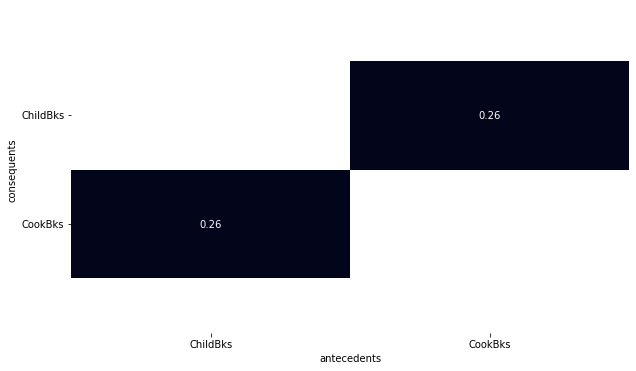

In [24]:
# Convert antecedents and consequents into strings
import  matplotlib.pyplot as plt
import seaborn as sns
rules4['antecedents'] = rules4['antecedents'].apply(lambda a: ','.join(list(a)))
rules4['consequents'] = rules4['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules4.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

# An leverage value of 0 indicates independence. Range will be [-1 1]

# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [27]:
rules1.sort_values("lift",ascending=False).tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,YouthBks,ChildBks,0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
0,ChildBks,YouthBks,0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
20,DoItYBks,CookBks,0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
21,CookBks,DoItYBks,0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
5,ChildBks,DoItYBks,0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,DoItYBks,ChildBks,0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,CookBks,YouthBks,0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,YouthBks,CookBks,0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,CookBks,ChildBks,0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,ChildBks,CookBks,0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [28]:
rules1.sort_values("lift",ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 28 to 2
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         100 non-null    object 
 1   consequents         100 non-null    object 
 2   antecedent support  100 non-null    float64
 3   consequent support  100 non-null    float64
 4   support             100 non-null    float64
 5   confidence          100 non-null    float64
 6   lift                100 non-null    float64
 7   leverage            100 non-null    float64
 8   conviction          100 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.8+ KB


In [29]:
rules1.sort_values("lift",ascending=False).corr()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,-0.592374,0.406223,-0.783487,-0.372747,0.215552,-0.739801
consequent support,-0.592374,1.000000,0.406223,0.934687,-0.372747,0.215552,0.791718
support,0.406223,0.406223,1.000000,0.154020,-0.684585,0.715494,-0.060557
confidence,-0.783487,0.934687,0.154020,1.000000,-0.036715,0.186727,0.908200
lift,-0.372747,-0.372747,-0.684585,-0.036715,1.000000,-0.054561,0.047668
leverage,0.215552,0.215552,0.715494,0.186727,-0.054561,1.000000,0.012068
conviction,-0.739801,0.791718,-0.060557,0.908200,0.047668,0.012068,1.000000


In [30]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,ChildBks,YouthBks,0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,YouthBks,ChildBks,0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,ChildBks,CookBks,0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,CookBks,ChildBks,0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,DoItYBks,ChildBks,0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"ArtBks,GeogBks",CookBks,0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"CookBks,GeogBks",ArtBks,0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,ArtBks,"CookBks,GeogBks",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,CookBks,"ArtBks,GeogBks",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


# Read the dataset

In [31]:
MMV = pd.read_csv("my_movies (1).csv")
MMV.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# EDA

In [32]:
MMV.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [33]:
MMV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [34]:
MMV.append

<bound method DataFrame.append of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2    

In [35]:
MMV.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [36]:
MMV.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [37]:
MMV.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


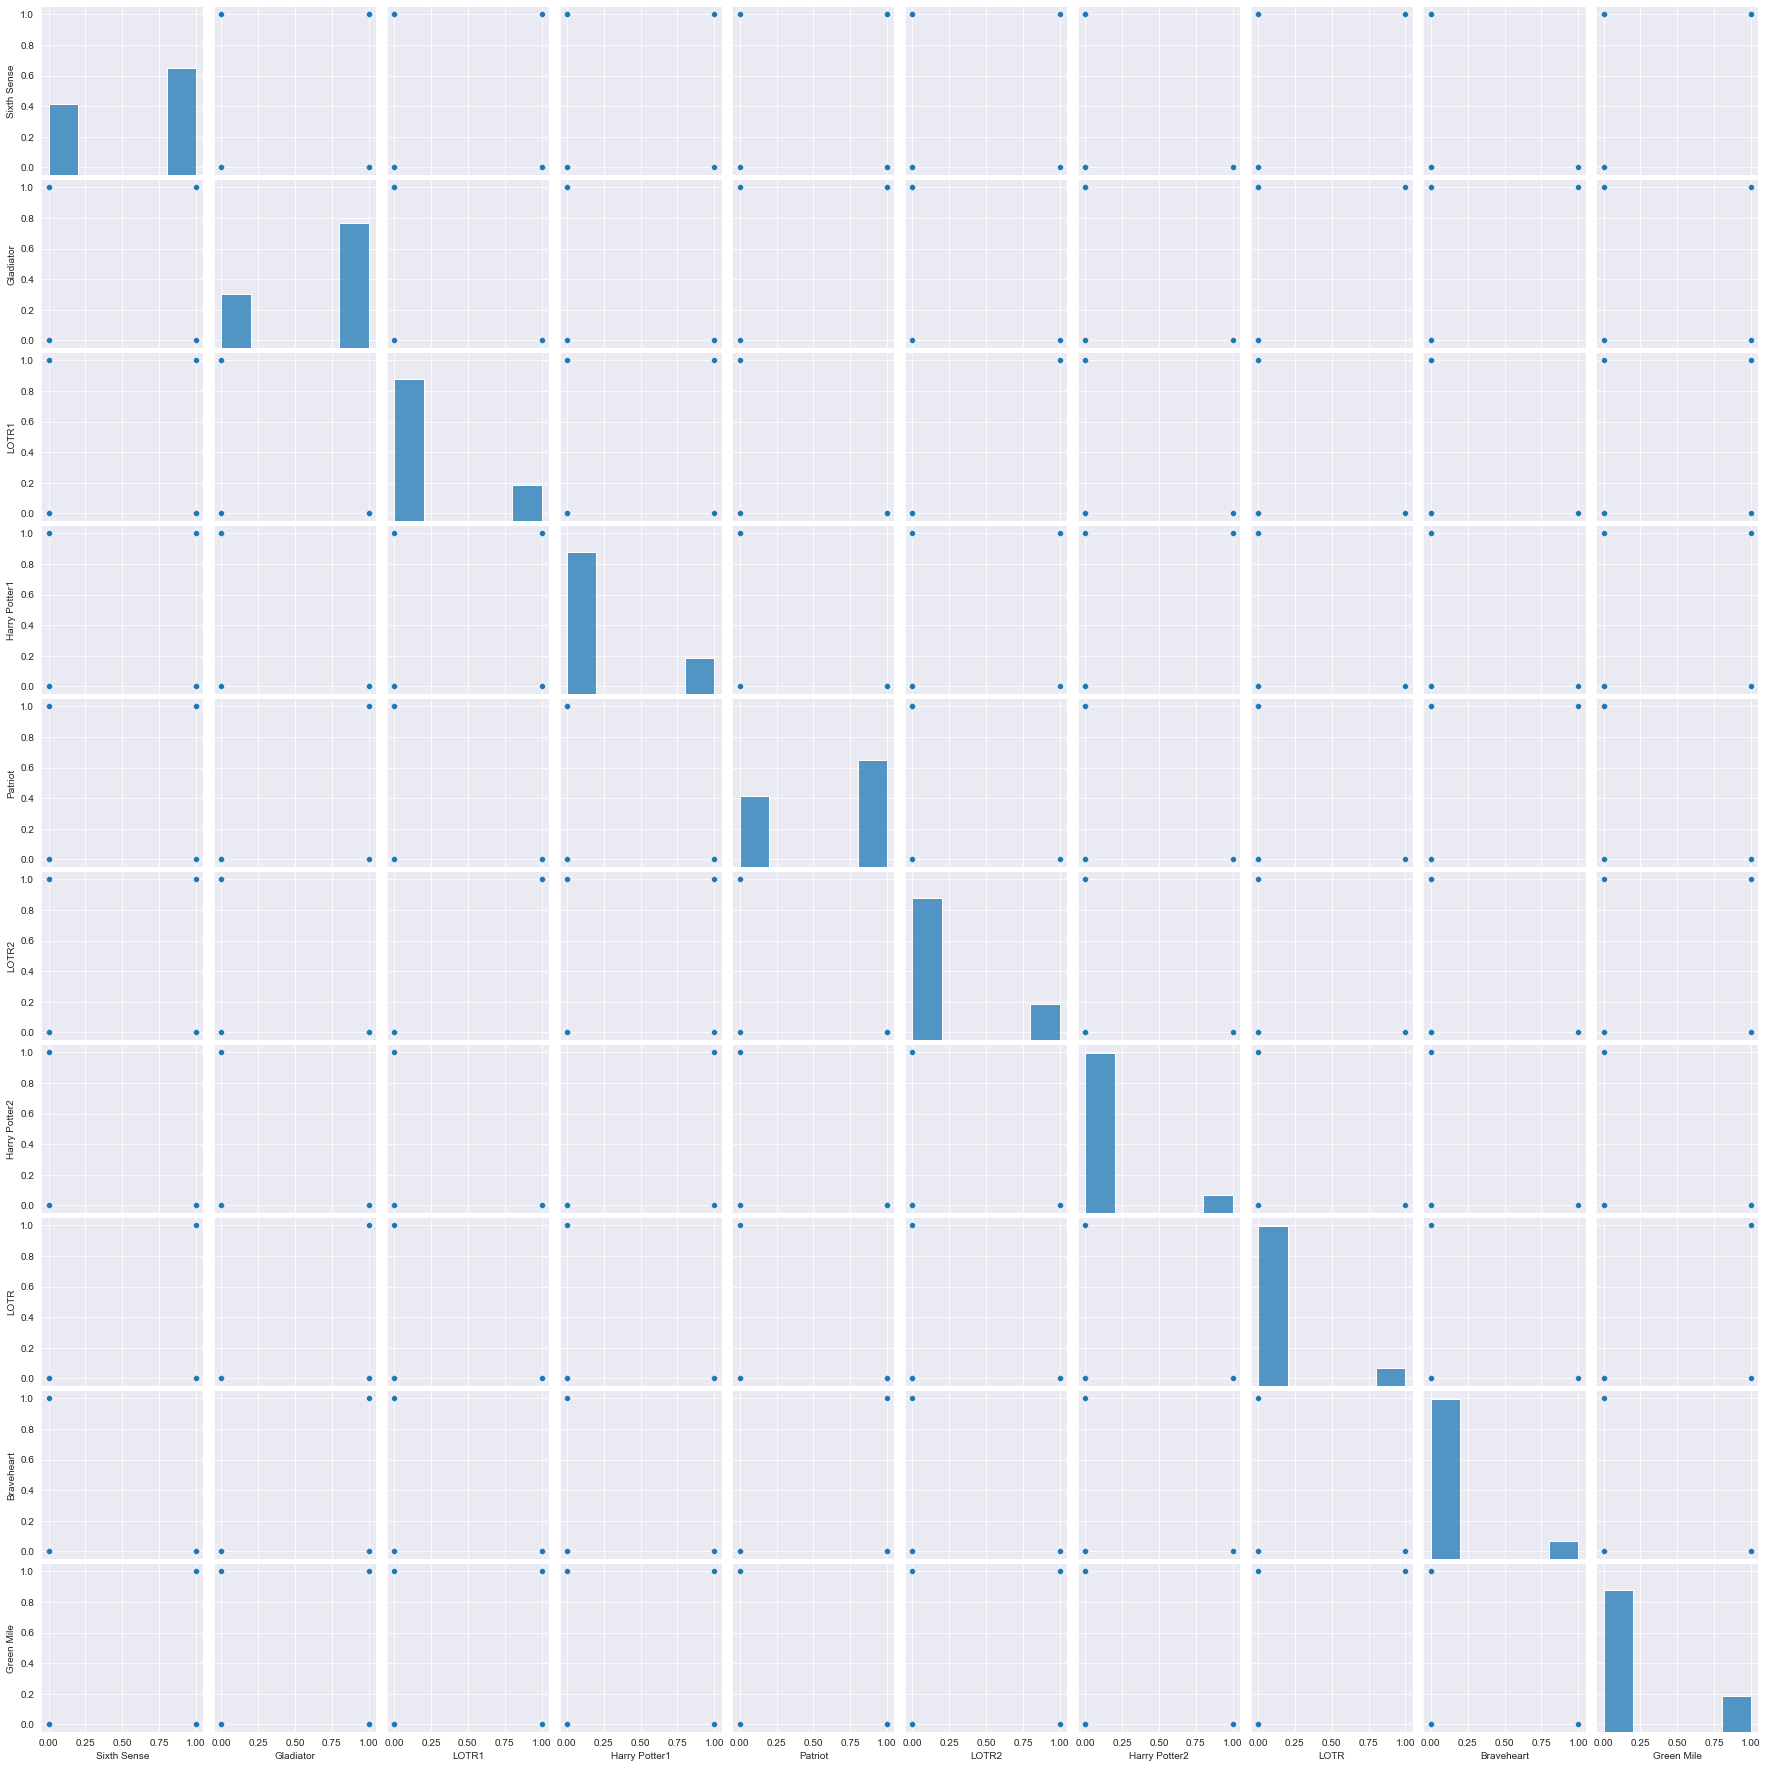

In [43]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(MMV)

# Pre-Processing

# As the data is not in transaction formation We are using transaction Encoder

In [38]:
MMV1 = pd.get_dummies(MMV)
MMV1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm

In [92]:
frequent_itemsets2 = apriori(MMV1,min_support=0.1,use_colnames=True) 
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, V4_Green Mile, Harry Potter1,..."
1393,0.1,"(V1_Sixth Sense, V4_Green Mile, Green Mile, LO..."
1394,0.1,"(V1_Sixth Sense, V4_Green Mile, Harry Potter1,..."
1395,0.1,"(V1_Sixth Sense, V4_Green Mile, Harry Potter1,..."


In [93]:
rules5 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rules5
rules5.sort_values("lift",ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3622,(Gladiator),"(Green Mile, V1_Sixth Sense, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
3615,"(Green Mile, V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
666,"(Green Mile, V1_Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1732,(Gladiator),"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
57,(V4_Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
229,(Gladiator),"(Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
1725,"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1613,"(Green Mile, Sixth Sense, V1_Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
228,"(Sixth Sense, V1_Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
40,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [94]:
rules5= association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.7)
rules5
rules5.sort_values("confidence",ascending=True).head(10) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3994,"(Gladiator, Sixth Sense)","(Patriot, V1_Gladiator, V2_Patriot)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4035,"(Gladiator, Sixth Sense)","(Patriot, V2_Patriot, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
11779,"(Gladiator, Sixth Sense)","(Patriot, V1_Gladiator, V3_Sixth Sense, V2_Pat...",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
1050,"(Gladiator, Sixth Sense)","(V2_Patriot, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
120,"(Gladiator, Sixth Sense)",(V3_Sixth Sense),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
115,"(Gladiator, Sixth Sense)",(V2_Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
110,"(Gladiator, Sixth Sense)",(V1_Gladiator),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
104,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
999,"(Gladiator, Sixth Sense)","(V1_Gladiator, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0


# Apriori Algorithm

In [85]:
frequent_itemsets3 = apriori(MMV1,min_support=0.2,use_colnames=6) 
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Patriot, V2_Patriot, Gladiator, Sixth Sense, ..."
77,0.4,"(V1_Gladiator, V2_Patriot, Gladiator, Sixth Se..."
78,0.4,"(Patriot, V1_Gladiator, V2_Patriot, Sixth Sens..."
79,0.4,"(Patriot, V1_Gladiator, V2_Patriot, Gladiator,..."


In [86]:
rules6 = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.6)
rules6
rules6.sort_values("lift",ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V4_Green Mile),"(Green Mile, Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
322,"(Sixth Sense, V4_Green Mile)","(Green Mile, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [87]:
rules6 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.6)
rules6
rules6.sort_values("confidence",ascending=False).head(5) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
312,"(V1_Gladiator, Sixth Sense)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
364,"(Gladiator, V3_Sixth Sense, V2_Patriot)",(V1_Gladiator),0.4,0.6,0.4,1.0,1.666667,0.16,inf
390,"(Patriot, V1_Gladiator, Sixth Sense, Gladiator)",(V2_Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
389,"(Patriot, V1_Gladiator, Sixth Sense, V2_Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
386,(V3_Sixth Sense),"(V1_Gladiator, V2_Patriot, Patriot)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


# An leverage value of 0 indicates independence. Range will be [-1 1]

# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [89]:
rules6.sort_values("lift",ascending=False).tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
45,"(V1_Gladiator, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
40,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
224,(Sixth Sense),"(V1_Gladiator, Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),(V2_Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
214,"(V1_Gladiator, Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
198,(Sixth Sense),"(Patriot, Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
188,"(Patriot, Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
53,(Sixth Sense),"(Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [90]:
rules6.sort_values("lift",ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 163 to 53
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         624 non-null    object 
 1   consequents         624 non-null    object 
 2   antecedent support  624 non-null    float64
 3   consequent support  624 non-null    float64
 4   support             624 non-null    float64
 5   confidence          624 non-null    float64
 6   lift                624 non-null    float64
 7   leverage            624 non-null    float64
 8   conviction          624 non-null    float64
dtypes: float64(7), object(2)
memory usage: 48.8+ KB
